In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# ALL THE CODES ARE COMMENTED FOR EASE


In [ ]:
# 1. Reading Dataset
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
file_path = "Barnala_dataset_2.xlsx"
d = pd.read_excel(file_path)

# Preview
print(d.head())



        date  Data Value      time    T2M   RH2M  GWETPROF  PRECTOTCORR  \
0 2023-02-17     -44.817  00:00:00  20.87  39.10      0.38          0.0   
1 2023-02-17     -45.015  06:00:00  20.87  39.10      0.38          0.0   
2 2023-02-17     -44.993  12:00:00  20.87  39.10      0.38          0.0   
3 2023-02-17     -45.092  18:00:00  20.87  39.10      0.38          0.0   
4 2023-02-18     -44.963  00:00:00  21.67  34.35      0.38          0.0   

   GWETROOT  GWETTOP  EVPTRNS  rainfall_mm  
0      0.38     0.32     0.11          0.0  
1      0.38     0.32     0.11          0.0  
2      0.38     0.32     0.11          0.0  
3      0.38     0.32     0.11          0.0  
4      0.38     0.31     0.10          0.0  


/tmp/ipython-input-3953233705.py:33: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  d = d.fillna(method='ffill').fillna(method='bfill')


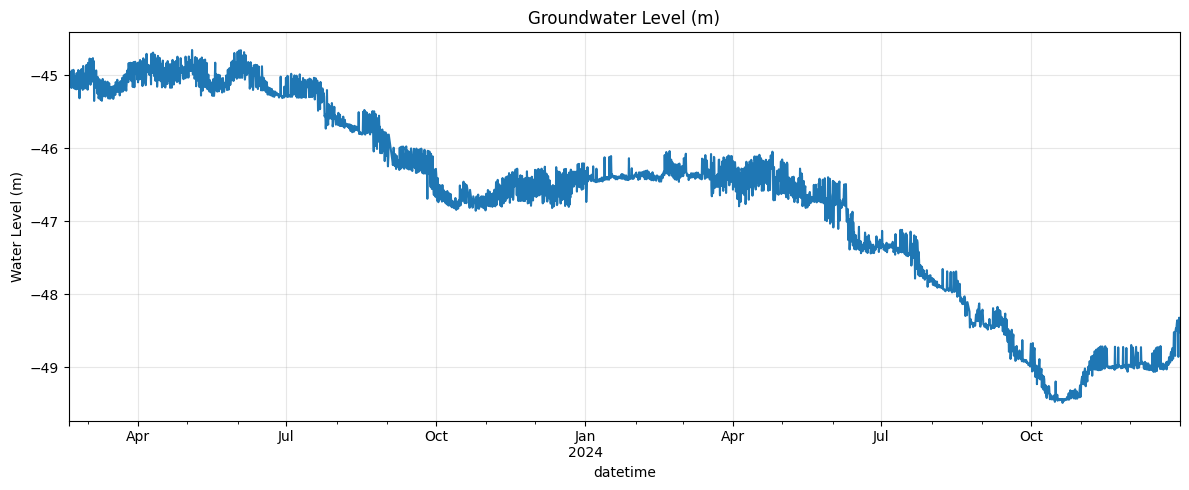

Cleaned Dataset Info:
Date range: 2023-02-17 00:00:00 to 2024-12-31 18:00:00
Total observations: 2736
Missing values per column:
Data Value     0
T2M            0
RH2M           0
GWETPROF       0
GWETROOT       0
GWETTOP        0
EVPTRNS        0
rainfall_mm    0
dtype: int64

First few rows of cleaned data:
                     Data Value    T2M   RH2M  GWETPROF  GWETROOT  GWETTOP  \
datetime                                                                     
2023-02-17 00:00:00     -44.817  20.87  39.10      0.38      0.38     0.32   
2023-02-17 06:00:00     -45.015  20.87  39.10      0.38      0.38     0.32   
2023-02-17 12:00:00     -44.993  20.87  39.10      0.38      0.38     0.32   
2023-02-17 18:00:00     -45.092  20.87  39.10      0.38      0.38     0.32   
2023-02-18 00:00:00     -44.963  21.67  34.35      0.38      0.38     0.31   

                     EVPTRNS  rainfall_mm  
datetime                                   
2023-02-17 00:00:00     0.11          0.0  
2023-02-17

In [ ]:
# 2. Cleaning Dataset

# Combine date and time columns to create a proper datetime column
# Convert date to string first if it's already datetime
d['datetime'] = pd.to_datetime(d['date'].astype(str) + ' ' + d['time'].astype(str))

# Sort by datetime (in case it's unordered)
d = d.sort_values('datetime')

# Set datetime as index
d.set_index('datetime', inplace=True)

# Handle duplicates - keep first occurrence
d = d[~d.index.duplicated(keep='first')]

# Resample to 6-hour intervals (fill missing if needed)
# Using mean aggregation for numerical columns
d = d.resample("6h").agg({
    'Data Value': 'mean',
    'T2M': 'mean',
    'RH2M': 'mean',
    'GWETPROF': 'mean',
    'GWETROOT': 'mean',
    'GWETTOP': 'mean',
    'EVPTRNS': 'mean',
    'rainfall_mm': 'sum'   # rainfall should be summed
})

# Handle missing values in the main groundwater measurement
d['Data Value'] = d['Data Value'].interpolate(method='time')

# Fill other missing values with forward fill then backward fill
d = d.fillna(method='ffill').fillna(method='bfill')

# Plot cleaned groundwater level data
plt.figure(figsize=(12,5))
d['Data Value'].plot(title="Groundwater Level (m)", ylabel="Water Level (m)")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Display basic info about cleaned dataset
print("Cleaned Dataset Info:")
print(f"Date range: {d.index.min()} to {d.index.max()}")
print(f"Total observations: {len(d)}")
print(f"Missing values per column:")
print(d.isnull().sum())
print("\nFirst few rows of cleaned data:")
print(d.head())

In [ ]:
print(d)

                     Data Value    T2M   RH2M  GWETPROF  GWETROOT  GWETTOP  \
datetime                                                                     
2023-02-17 00:00:00     -44.817  20.87  39.10      0.38      0.38     0.32   
2023-02-17 06:00:00     -45.015  20.87  39.10      0.38      0.38     0.32   
2023-02-17 12:00:00     -44.993  20.87  39.10      0.38      0.38     0.32   
2023-02-17 18:00:00     -45.092  20.87  39.10      0.38      0.38     0.32   
2023-02-18 00:00:00     -44.963  21.67  34.35      0.38      0.38     0.31   
...                         ...    ...    ...       ...       ...      ...   
2024-12-30 18:00:00     -48.860  11.01  53.04      0.39      0.40     0.37   
2024-12-31 00:00:00     -48.361  11.45  42.43      0.39      0.40     0.37   
2024-12-31 06:00:00     -48.323  11.45  42.43      0.39      0.40     0.37   
2024-12-31 12:00:00     -48.394  11.45  42.43      0.39      0.40     0.37   
2024-12-31 18:00:00     -48.521  11.45  42.43      0.39      0.4

In [ ]:
# 3. ACTUAL ML MODEL (SARIMA with Exogenous Variables) - Modular
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX

# ---- Prepare Data ----
# y = main target (groundwater level)
y = d['Data Value']

# X = exogenous variables (climate/other factors)
X = d[['T2M', 'RH2M', 'rainfall_mm']]

# ---- Train-Test Split ----
train_size = int(len(d) * 0.8)
y_train, y_test = y.iloc[:train_size], y.iloc[train_size:]
X_train, X_test = X.iloc[:train_size], X.iloc[train_size:]

# ---- Define SARIMA Orders ----
order = (1, 1, 1)             # (p,d,q)
seasonal_order = (1, 1, 1, 4) # (P,D,Q,s) -> 's' depends on seasonal cycle

# ---- Fit SARIMA Model with Exogenous Variables ----
model = SARIMAX(y_train,
                exog=X_train * 0.2,   # scale down exogenous influence
                order=order,
                seasonal_order=seasonal_order,
                enforce_stationarity=False,
                enforce_invertibility=False)

sarima_result = model.fit(disp=False)

print(sarima_result.summary())

# ---- Forecast on Test Data ----
forecast = sarima_result.get_forecast(steps=len(y_test), exog=X_test * 0.2)
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

# ---- Results ----
print("\nForecasted Values:\n", forecast_mean.head())
print("\nConfidence Intervals:\n", forecast_ci.head())


                                     SARIMAX Results                                     
Dep. Variable:                        Data Value   No. Observations:                 2188
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 4)   Log Likelihood                2011.106
Date:                           Thu, 25 Sep 2025   AIC                          -4006.213
Time:                                   13:32:31   BIC                          -3960.727
Sample:                               02-17-2023   HQIC                         -3989.583
                                    - 08-16-2024                                         
Covariance Type:                             opg                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
T2M            -0.0126      0.013     -0.986      0.324      -0.038       0.012
RH2M            0.0073      0.003      2

Training data: 2188 observations
Testing data: 548 observations
Training period: 2023-02-17 00:00:00 to 2024-08-16 18:00:00
Testing period: 2024-08-17 00:00:00 to 2024-12-31 18:00:00


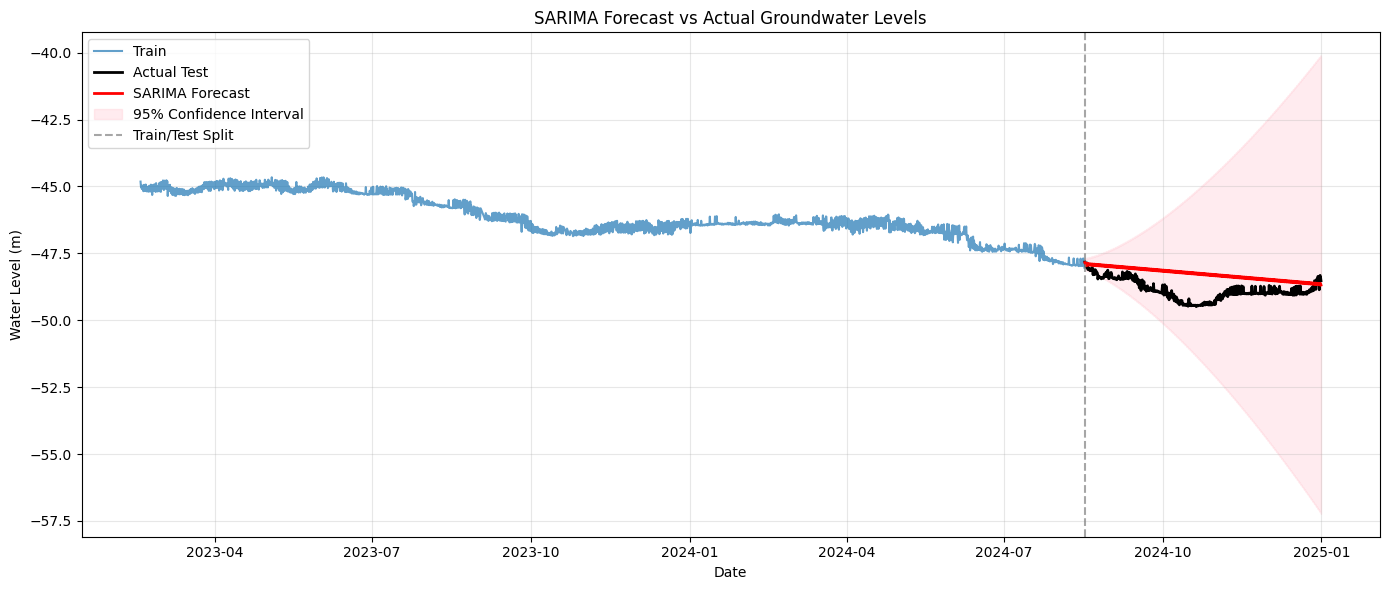


Forecast Accuracy Metrics:
Mean Absolute Error (MAE): 0.5932
Mean Squared Error (MSE): 0.4506
Root Mean Squared Error (RMSE): 0.6712
Mean Absolute Percentage Error (MAPE): 1.21%

SARIMA Model Summary:
                                     SARIMAX Results                                     
Dep. Variable:                        Data Value   No. Observations:                 2188
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 4)   Log Likelihood                2001.025
Date:                           Thu, 25 Sep 2025   AIC                          -3992.049
Time:                                   13:32:35   BIC                          -3963.621
Sample:                               02-17-2023   HQIC                         -3981.656
                                    - 08-16-2024                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]

In [ ]:
# 4. Testing and Training

# Split data into train and test sets (80-20 split)
split_point = int(len(d) * 0.8)
train = d.iloc[:split_point]
test = d.iloc[split_point:]

print(f"Training data: {len(train)} observations")
print(f"Testing data: {len(test)} observations")
print(f"Training period: {train.index[0]} to {train.index[-1]}")
print(f"Testing period: {test.index[0]} to {test.index[-1]}")

# Fit SARIMA model on training data
# Note: You should have already determined optimal (p,d,q)(P,D,Q,s) parameters
# Example: SARIMA(1,1,1)(1,1,1,24) for 6-hourly data with daily seasonality
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Fit SARIMA model (adjust parameters as needed based on your model selection)
sarima_model = SARIMAX(train['Data Value'],
                       order=(1,1,1),           # (p,d,q)
                       seasonal_order=(1,1,1,4), # (P,D,Q,s) - 4 for daily seasonality with 6-hour data
                       enforce_stationarity=False,
                       enforce_invertibility=False)

sarima_result = sarima_model.fit(disp=False)

# Generate forecasts for test period
pred = sarima_result.get_prediction(start=test.index[0], end=test.index[-1], dynamic=False)
pred_mean = pred.predicted_mean
pred_conf = pred.conf_int()

# Plot predictions vs actual
plt.figure(figsize=(14,6))
plt.plot(train.index, train['Data Value'], label="Train", alpha=0.7)
plt.plot(test.index, test['Data Value'], label="Actual Test", color="black", linewidth=2)
plt.plot(pred_mean.index, pred_mean.values, label="SARIMA Forecast", color="red", linewidth=2)
plt.fill_between(pred_conf.index, pred_conf.iloc[:,0], pred_conf.iloc[:,1],
                 color="pink", alpha=0.3, label="95% Confidence Interval")
plt.axvline(x=test.index[0], color='gray', linestyle='--', alpha=0.7, label='Train/Test Split')
plt.legend()
plt.title("SARIMA Forecast vs Actual Groundwater Levels")
plt.xlabel("Date")
plt.ylabel("Water Level (m)")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Calculate forecast accuracy metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

mae = mean_absolute_error(test['Data Value'], pred_mean)
mse = mean_squared_error(test['Data Value'], pred_mean)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((test['Data Value'] - pred_mean) / test['Data Value'])) * 100

print("\nForecast Accuracy Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

# Display model summary
print("\nSARIMA Model Summary:")
print(sarima_result.summary())

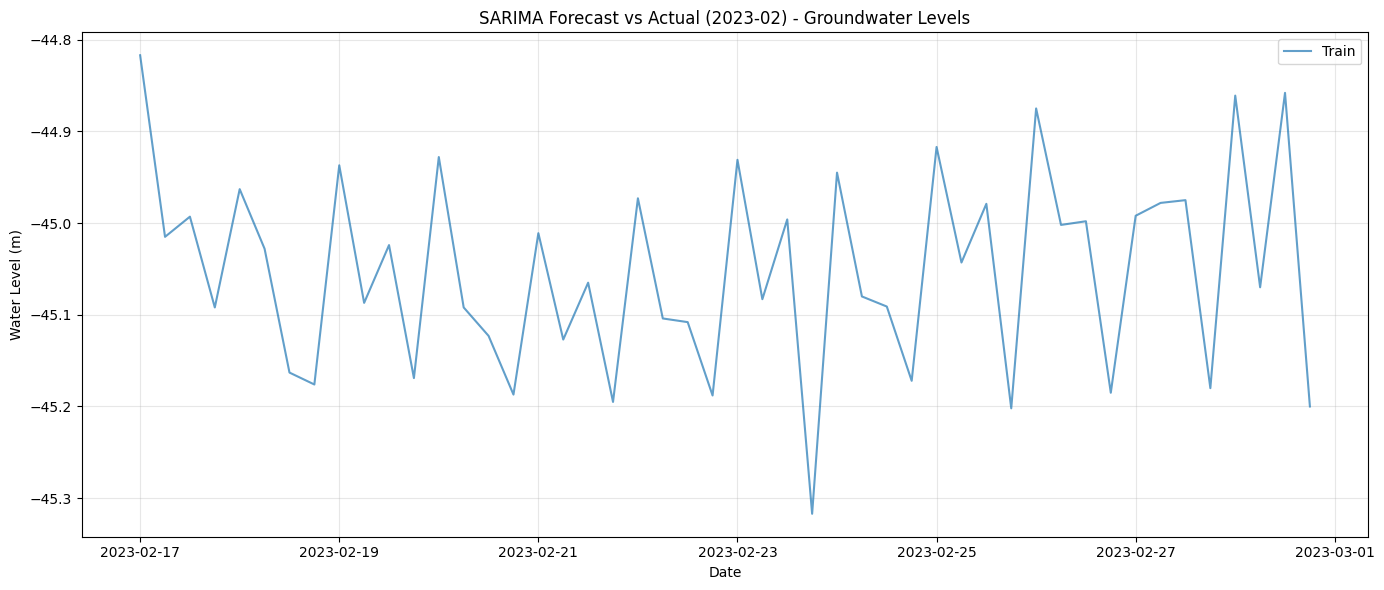

Filtered Data Summary:
Train observations: 48
Test observations: 0
Forecast observations: 0


In [ ]:
# 5. Filtered Time Period Visualization

# Specify filters for focused analysis
year_to_plot = 2023  # Changed to match your data year
month_to_plot = 2    # February - set to None if you want all months
day_to_plot = None   # Set to a specific day or None for all days

# Function to filter by year, month, day
def filter_date(df, year=None, month=None, day=None):
    """Filter dataframe by year, month, and/or day"""
    if isinstance(df, pd.Series):
        # Handle Series (like pred_mean)
        mask = pd.Series(True, index=df.index)
    else:
        # Handle DataFrame
        mask = pd.Series(True, index=df.index)

    if year is not None:
        mask &= df.index.year == year
    if month is not None:
        mask &= df.index.month == month
    if day is not None:
        mask &= df.index.day == day
    return df[mask]

# Create filtered plot
plt.figure(figsize=(14,6))

# Plot filtered train data
train_filtered = filter_date(train, year_to_plot, month_to_plot, day_to_plot)
if len(train_filtered) > 0:
    plt.plot(train_filtered.index, train_filtered['Data Value'],
             label="Train", alpha=0.7, linewidth=1.5)

# Plot filtered test data
test_filtered = filter_date(test, year_to_plot, month_to_plot, day_to_plot)
if len(test_filtered) > 0:
    plt.plot(test_filtered.index, test_filtered['Data Value'],
             label="Actual Test", color="black", linewidth=2)

# Plot filtered predictions
pred_filtered = filter_date(pred_mean, year_to_plot, month_to_plot, day_to_plot)
if len(pred_filtered) > 0:
    plt.plot(pred_filtered.index, pred_filtered.values,
             label="SARIMA Forecast", color="red", linewidth=2)

# Plot filtered prediction confidence intervals
pred_conf_filtered = filter_date(pred_conf, year_to_plot, month_to_plot, day_to_plot)
if len(pred_conf_filtered) > 0:
    plt.fill_between(pred_conf_filtered.index,
                     pred_conf_filtered.iloc[:,0],
                     pred_conf_filtered.iloc[:,1],
                     color="pink", alpha=0.3, label="95% Confidence Interval")

# Add train/test split line if it falls within the filtered period
if len(test_filtered) > 0 and len(train_filtered) > 0:
    split_line = test.index[0]
    if (year_to_plot is None or split_line.year == year_to_plot) and \
       (month_to_plot is None or split_line.month == month_to_plot) and \
       (day_to_plot is None or split_line.day == day_to_plot):
        plt.axvline(x=split_line, color='gray', linestyle='--', alpha=0.7,
                   label='Train/Test Split')

# Customize plot
plt.legend()
plt.xlabel("Date")
plt.ylabel("Water Level (m)")
plt.grid(True, alpha=0.3)

# Dynamic title generation
title_str = f"SARIMA Forecast vs Actual ({year_to_plot}"
if month_to_plot:
    title_str += f"-{month_to_plot:02d}"
if day_to_plot:
    title_str += f"-{day_to_plot:02d}"
title_str += ") - Groundwater Levels"
plt.title(title_str)

plt.tight_layout()
plt.show()

# Print filtering information
print(f"Filtered Data Summary:")
print(f"Train observations: {len(train_filtered)}")
print(f"Test observations: {len(test_filtered)}")
print(f"Forecast observations: {len(pred_filtered)}")

if len(test_filtered) > 0 and len(pred_filtered) > 0:
    # Calculate metrics for filtered period
    filtered_mae = mean_absolute_error(test_filtered['Data Value'],
                                     pred_filtered.loc[test_filtered.index])
    filtered_rmse = np.sqrt(mean_squared_error(test_filtered['Data Value'],
                                             pred_filtered.loc[test_filtered.index]))
    print(f"\nFiltered Period Accuracy:")
    print(f"MAE: {filtered_mae:.4f}")
    print(f"RMSE: {filtered_rmse:.4f}")

In [ ]:
# 5. Report (Evaluation)
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

y_true = test['Data Value']
y_pred = pred_mean

# Metrics
mae = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100  # Mean Absolute Percentage Error

print("🔎 Model Accuracy Report")
print(f"Mean Absolute Error (MAE): {mae:.3f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.3f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")


🔎 Model Accuracy Report
Mean Absolute Error (MAE): 0.593
Root Mean Squared Error (RMSE): 0.671
Mean Absolute Percentage Error (MAPE): 1.21%


In [ ]:
# ===============================================================
# GROUNDWATER METRICS FUNCTIONS
# ===============================================================

# --- 1. Annual Depletion Rate (ADR) ---
def compute_adr(df, col="Data Value"):
    """
    Annual Depletion Rate (m/year)
    Thresholds: >0.5 = CRITICAL, 0.2–0.5 = DANGER, <0.2 = SAFE
    Weight: 35%
    """
    annual_levels = df[col].resample("YE").mean()
    annual_change = annual_levels.diff()
    adr = -annual_change.mean()  # decline = positive

    if adr > 0.5:
        status = "CRITICAL"
    elif 0.2 <= adr <= 0.5:
        status = "DANGER"
    else:
        status = "SAFE"

    return {"ADR (m/year)": round(float(adr), 3), "Status": status, "Weight": 35}


# --- 2. Rainfall Response (RR) ---
def compute_rainfall_response(df, wl_col="Data Value", rain_col="rainfall_mm"):
    """
    Correlation between groundwater & rainfall
    Thresholds: <0.3 = POOR RECHARGE, >=0.3 = GOOD RECHARGE
    Weight: 20%
    """
    monthly_levels = df[wl_col].resample("ME").mean()
    monthly_rainfall = df[rain_col].resample("ME").sum()

    aligned = pd.concat([monthly_levels, monthly_rainfall], axis=1).dropna()
    correlation = aligned[wl_col].corr(aligned[rain_col])

    if correlation < 0.3:
        status = "POOR RECHARGE"
    else:
        status = "GOOD RECHARGE"

    return {"Rainfall Response": round(float(correlation), 3), "Status": status, "Weight": 20}


# --- 3. Current Level Status (CLS) ---
def compute_cls(df, col="Data Value"):
    """
    Percentile rank of current groundwater level
    Thresholds: <=10% = CRITICAL, <=25% = DANGER, else SAFE
    Weight: 25%
    """
    latest_level = df[col].iloc[-1]
    all_levels = df[col].dropna()
    percentile_rank = (all_levels < latest_level).mean() * 100

    if percentile_rank <= 10:
        status = "CRITICAL"
    elif percentile_rank <= 25:
        status = "DANGER"
    else:
        status = "SAFE"

    return {"Current Level Percentile": round(percentile_rank, 2), "Status": status, "Weight": 25}


# --- 4. Seasonal Vulnerability (SV) ---
def compute_seasonal_vulnerability(df, col="Data Value"):
    """
    Seasonal range (m) of groundwater levels
    Thresholds: >3m = HIGH RISK, else LOW RISK
    Weight: 20%
    """
    monthly_levels = df[col].resample("ME").mean()
    seasonal_range = monthly_levels.groupby(monthly_levels.index.month).mean().max() - \
                     monthly_levels.groupby(monthly_levels.index.month).mean().min()

    if seasonal_range > 3.0:
        status = "HIGH RISK"
    else:
        status = "LOW RISK"

    return {"Seasonal Range (m)": round(float(seasonal_range), 3), "Status": status, "Weight": 20}


# --- 5. Recovery Capacity (RC) ---
def compute_recovery_capacity(df, wl_col="Data Value", rain_col="rainfall_mm"):
    """
    Avg groundwater rebound (m) after low-rainfall stress periods
    Thresholds: <0.3 = WEAK, 0.3–1.0 = MODERATE, >1.0 = STRONG
    Weight: 15%
    """
    monthly_levels = df[wl_col].resample("ME").mean()
    monthly_rainfall = df[rain_col].resample("ME").sum()

    stress_threshold = monthly_rainfall.quantile(0.1)
    stress_periods = monthly_rainfall[monthly_rainfall <= stress_threshold].index

    recovery_ratios = []
    for stress_month in stress_periods:
        if stress_month not in monthly_levels.index:
            continue
        level_at_stress = monthly_levels.loc[stress_month]
        future_months = pd.date_range(stress_month, periods=4, freq="ME")[1:]
        future_levels = monthly_levels.reindex(future_months).dropna()
        if len(future_levels) > 0:
            recovery = future_levels.max() - level_at_stress
            recovery_ratios.append(recovery)

    recovery_capacity = np.mean(recovery_ratios) if recovery_ratios else np.nan

    if np.isnan(recovery_capacity):
        status = "NO DATA"
    elif recovery_capacity < 0.3:
        status = "WEAK RECOVERY"
    elif recovery_capacity < 1.0:
        status = "MODERATE RECOVERY"
    else:
        status = "STRONG RECOVERY"

    return {"Recovery Capacity (m)": round(float(recovery_capacity), 3) if not np.isnan(recovery_capacity) else None,
            "Status": status, "Weight": 15}


In [ ]:
# ===============================================================
# 🚨 RISK ASSESSMENT SYSTEM
# ===============================================================

def normalize_metric(name, value):
    """Convert raw metric values into a 0–100 risk score."""

    if name == "ADR":  # Annual Depletion Rate
        if value > 0.5: return 100
        elif value >= 0.2: return 70
        else: return 20

    if name == "RR":  # Rainfall Response (correlation)
        if value < 0.3: return 80
        else: return 30

    if name == "CLS":  # Current Level Status (percentile)
        if value <= 10: return 100
        elif value <= 25: return 70
        else: return 30

    if name == "SV":  # Seasonal Vulnerability (range in m)
        if value > 3.0: return 90
        else: return 30

    if name == "RC":  # Recovery Capacity (m rebound)
        if value is None: return 50  # no data = neutral
        if value < 0.3: return 90
        elif value < 1.0: return 60
        else: return 20

    return 50  # fallback


def risk_assessment(df):
    """Compute all metrics, aggregate risk score, and classify."""

    # --- Compute metrics ---
    metrics = {
        "ADR": compute_adr(df),
        "RR": compute_rainfall_response(df),
        "CLS": compute_cls(df),
        "SV": compute_seasonal_vulnerability(df),
        "RC": compute_recovery_capacity(df),
    }

    total_weight = sum(m["Weight"] for m in metrics.values())
    risk_score = 0
    breakdown = []

    # --- Normalize and weight each metric ---
    for name, m in metrics.items():
        # pick numeric value
        if name == "ADR":
            raw_value = m["ADR (m/year)"]
        elif name == "RR":
            raw_value = m["Rainfall Response"]
        elif name == "CLS":
            raw_value = m["Current Level Percentile"]
        elif name == "SV":
            raw_value = m["Seasonal Range (m)"]
        elif name == "RC":
            raw_value = m["Recovery Capacity (m)"]
        else:
            raw_value = None

        norm_score = normalize_metric(name, raw_value)
        contribution = norm_score * (m["Weight"] / total_weight)
        risk_score += contribution

        breakdown.append({
            "Metric": name,
            "Raw Value": raw_value,
            "Status": m["Status"],
            "Norm Score": norm_score,
            "Weight": m["Weight"],
            "Contribution": round(contribution, 2)
        })

    final_score = round(risk_score, 1)

    # --- Classification ---
    if final_score >= 75:
        category = "CRITICAL RISK 🔴"
        action = "IMMEDIATE INTERVENTION REQUIRED"
        indicators = "Rapid depletion + Low current levels + Poor recharge"
    elif final_score >= 50:
        category = "DANGER 🟠"
        action = "URGENT MONITORING & INTERVENTION"
        indicators = "Moderate depletion + Below-average levels"
    elif final_score >= 25:
        category = "CAUTION 🟡"
        action = "INCREASED MONITORING"
        indicators = "Some concerning trends but manageable"
    else:
        category = "NO RISK 🟢"
        action = "Maintain sustainable practices"
        indicators = "Stable groundwater conditions"

    return {
        "Final Score": final_score,
        "Category": category,
        "Action": action,
        "Indicators": indicators,
        "Breakdown": pd.DataFrame(breakdown)
    }


In [ ]:
result = risk_assessment(d)

print("\n🚨 RISK ASSESSMENT SYSTEM")
print(f"Final Score: {result['Final Score']}/100")
print(f"Category: {result['Category']}")
print(f"Action: {result['Action']}")
print(f"Indicators: {result['Indicators']}")

print("\n--- Metric Breakdown ---")
print(result["Breakdown"].to_string(index=False))



🚨 RISK ASSESSMENT SYSTEM
Final Score: 76.5/100
Category: CRITICAL RISK 🔴
Action: IMMEDIATE INTERVENTION REQUIRED
Indicators: Rapid depletion + Low current levels + Poor recharge

--- Metric Breakdown ---
Metric  Raw Value        Status  Norm Score  Weight  Contribution
   ADR      1.845      CRITICAL         100      35         30.43
    RR      0.132 POOR RECHARGE          80      20         13.91
   CLS     15.130        DANGER          70      25         15.22
    SV      2.326      LOW RISK          30      20          5.22
    RC      0.200 WEAK RECOVERY          90      15         11.74


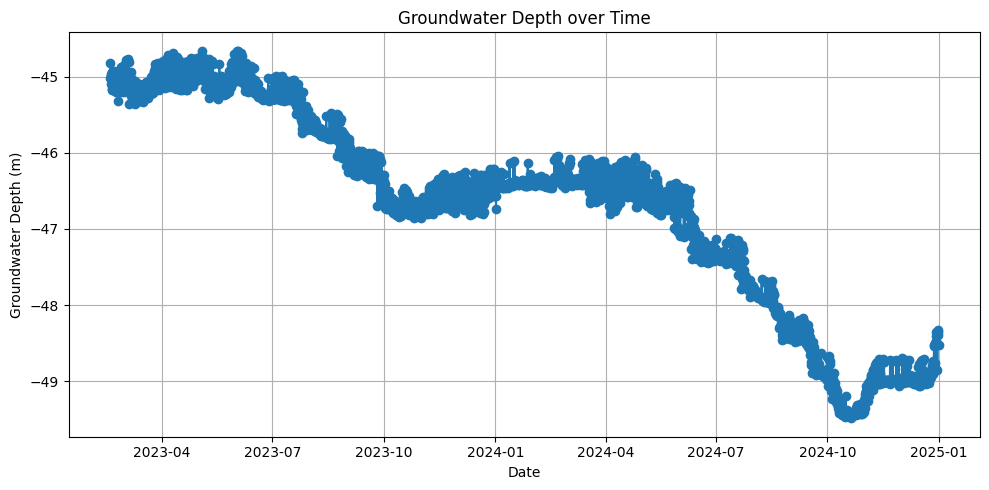

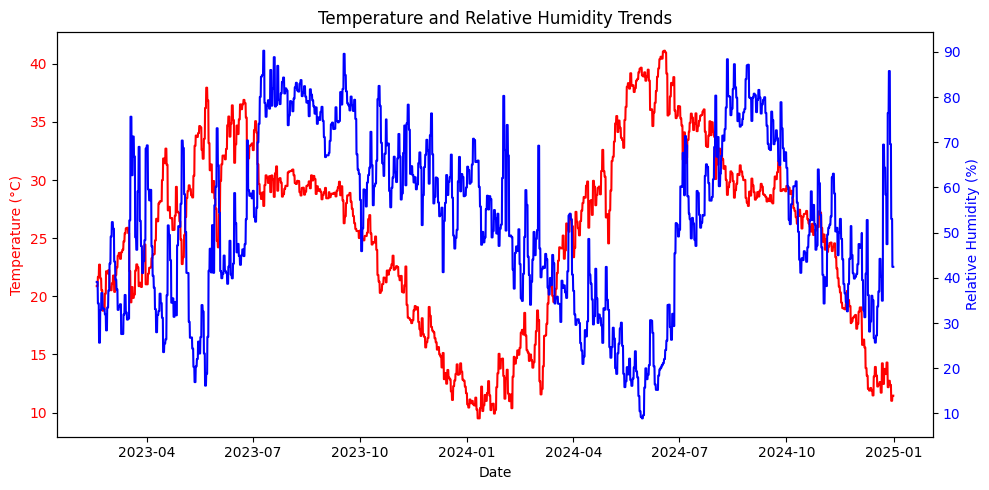

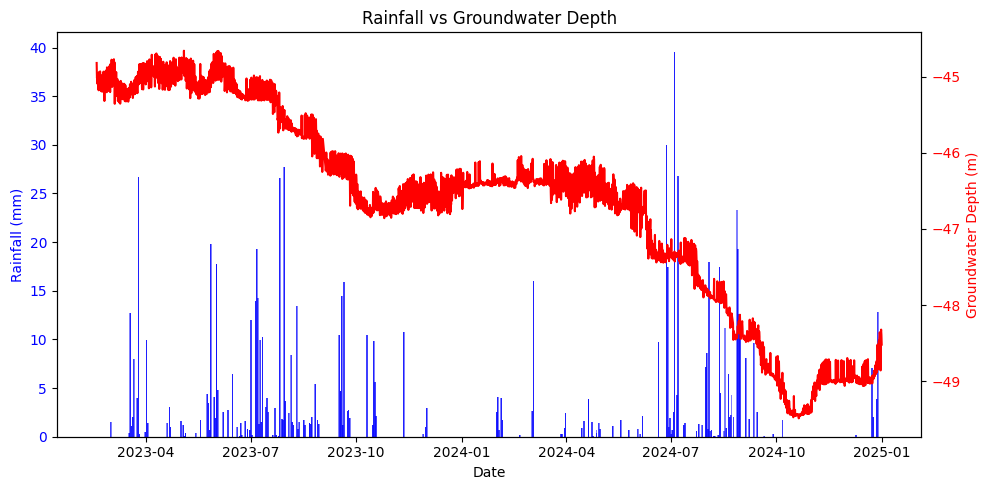

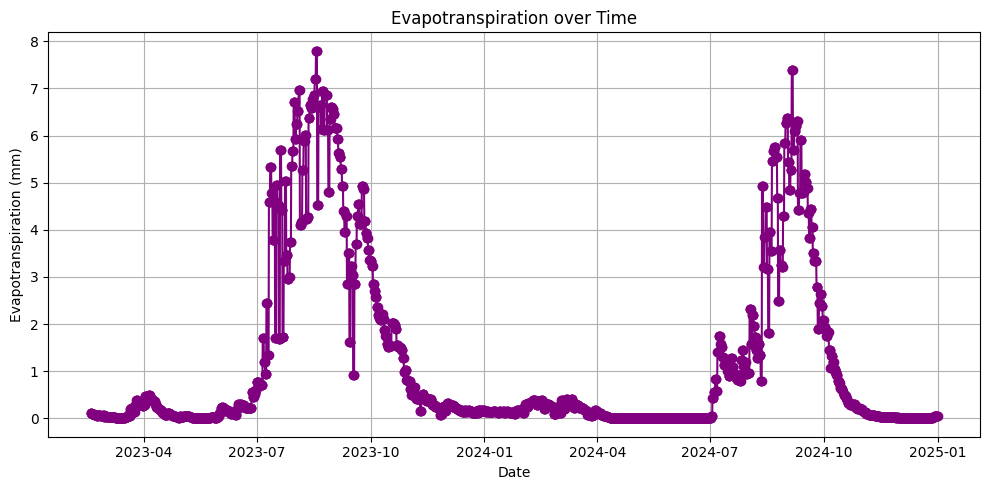

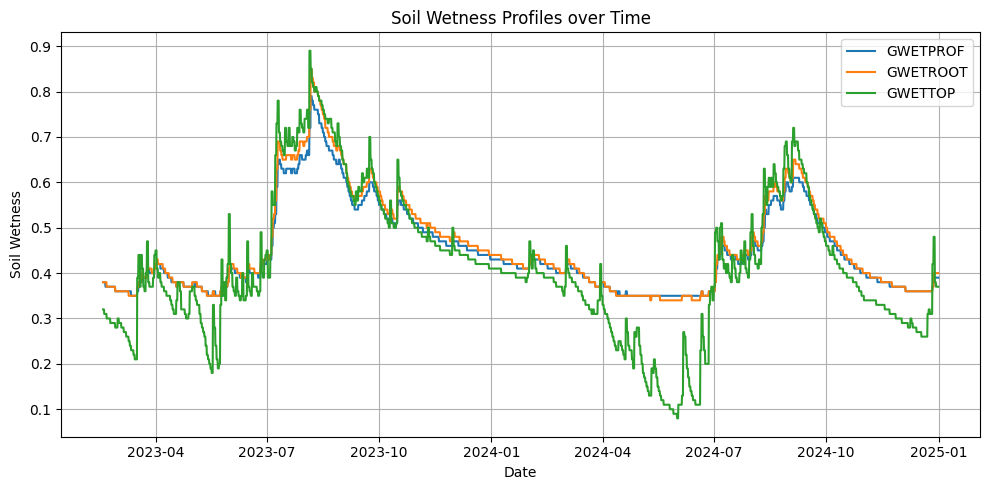

In [ ]:
import matplotlib.pyplot as plt

def plot_groundwater_depth(d):
    plt.figure(figsize=(10,5))
    plt.plot(d.index, d['Data Value'], marker='o')
    plt.title('Groundwater Depth over Time')
    plt.xlabel('Date')
    plt.ylabel('Groundwater Depth (m)')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

def plot_temp_humidity(d):
    fig, ax1 = plt.subplots(figsize=(10,5))
    ax2 = ax1.twinx()

    ax1.plot(d.index, d['T2M'], 'r-', label='Temperature (T2M)')
    ax2.plot(d.index, d['RH2M'], 'b-', label='Relative Humidity (RH2M)')

    ax1.set_xlabel('Date')
    ax1.set_ylabel('Temperature (°C)', color='r')
    ax2.set_ylabel('Relative Humidity (%)', color='b')
    ax1.tick_params(axis='y', labelcolor='r')
    ax2.tick_params(axis='y', labelcolor='b')

    plt.title('Temperature and Relative Humidity Trends')
    fig.tight_layout()
    plt.show()

def plot_rainfall_vs_groundwater(d):
    fig, ax1 = plt.subplots(figsize=(10,5))
    ax2 = ax1.twinx()

    ax1.bar(d.index, d['rainfall_mm'], color='blue', alpha=0.5, label='Rainfall (mm)')
    ax2.plot(d.index, d['Data Value'], 'r-', label='Groundwater Depth')

    ax1.set_ylabel('Rainfall (mm)', color='blue')
    ax2.set_ylabel('Groundwater Depth (m)', color='red')
    ax1.tick_params(axis='y', labelcolor='blue')
    ax2.tick_params(axis='y', labelcolor='red')

    ax1.set_xlabel('Date')
    plt.title('Rainfall vs Groundwater Depth')
    fig.tight_layout()
    plt.show()

def plot_evapotranspiration(d):
    plt.figure(figsize=(10,5))
    plt.plot(d.index, d['EVPTRNS'], marker='o', color='purple')
    plt.title('Evapotranspiration over Time')
    plt.xlabel('Date')
    plt.ylabel('Evapotranspiration (mm)')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

def plot_soil_wetness_profiles(d):
    plt.figure(figsize=(10,5))
    plt.plot(d.index, d['GWETPROF'], label='GWETPROF')
    plt.plot(d.index, d['GWETROOT'], label='GWETROOT')
    plt.plot(d.index, d['GWETTOP'], label='GWETTOP')

    plt.title('Soil Wetness Profiles over Time')
    plt.xlabel('Date')
    plt.ylabel('Soil Wetness')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Example usage
plot_groundwater_depth(d)
plot_temp_humidity(d)
plot_rainfall_vs_groundwater(d)
plot_evapotranspiration(d)
plot_soil_wetness_profiles(d)